# Large Smart-Seq2 data

Let's explore a large Smart-Seq2 data -- a seqeuncing technology that can have really high sequencing depth per cell.

## Opening the census

First we open the Cell Census, if you are not familiar with the basics of Cell Census API you should take a look at notebook "Learning about the CELLxGENE Cell Census" at `comp_bio_census_info.ipynb`.

In [1]:
import cell_census
import scanpy as sc

census = cell_census.open_soma()

These are the dataset IDs for some human Smart-Seq2 data that we know has high sequencing depth. Let's see what collection they are coming from.

In [2]:
human_datasets = ['232f6a5a-a04c-4758-a6e8-88ab2e3a6e69',
       '1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1',
       'a68b64d8-aee3-4947-81b7-36b8fe5a44d2',
       '97a17473-e2b1-4f31-a544-44a60773e2dd',
       'c5d88abe-f23a-45fa-a534-788985e93dad',
       '53d208b0-2cfd-4366-9866-c3c6114081bc',
       'e04daea4-4412-45b5-989e-76a9be070a89']

In [3]:
datasets = census["census_info"]["datasets"].read_as_pandas_all()
datasets.loc[[i in human_datasets for i in datasets["dataset_id"]],]

,soma_joinid,collection_id,collection_name,collection_doi,dataset_id,dataset_title,dataset_h5ad_path,dataset_total_cell_count
260,260,edb893ee-4066-4128-9aec-5eb2b03f8287,High-resolution single-cell atlas reveals dive...,10.1016/j.ccell.2022.10.008,232f6a5a-a04c-4758-a6e8-88ab2e3a6e69,The single-cell lung cancer atlas (LuCA) -- co...,232f6a5a-a04c-4758-a6e8-88ab2e3a6e69.h5ad,892296
261,261,edb893ee-4066-4128-9aec-5eb2b03f8287,High-resolution single-cell atlas reveals dive...,10.1016/j.ccell.2022.10.008,1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1,The single-cell lung cancer atlas (LuCA) -- ex...,1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1.h5ad,1283972
273,273,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,a68b64d8-aee3-4947-81b7-36b8fe5a44d2,Tabula Sapiens - Stromal,a68b64d8-aee3-4947-81b7-36b8fe5a44d2.h5ad,82478
274,274,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,97a17473-e2b1-4f31-a544-44a60773e2dd,Tabula Sapiens - Epithelial,97a17473-e2b1-4f31-a544-44a60773e2dd.h5ad,104148
275,275,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,c5d88abe-f23a-45fa-a534-788985e93dad,Tabula Sapiens - Immune,c5d88abe-f23a-45fa-a534-788985e93dad.h5ad,264824
277,277,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,53d208b0-2cfd-4366-9866-c3c6114081bc,Tabula Sapiens - All Cells,53d208b0-2cfd-4366-9866-c3c6114081bc.h5ad,483152
317,317,5d445965-6f1a-4b68-ba3a-b8f765155d3a,A molecular cell atlas of the human lung from ...,10.1038/s41586-020-2922-4,e04daea4-4412-45b5-989e-76a9be070a89,"Krasnow Lab Human Lung Cell Atlas, Smart-seq2",e04daea4-4412-45b5-989e-76a9be070a89.h5ad,9409


## Fetching one large Smart-Seq2 data

Let's get some example data by fetching the dataset with highest number of cells:

- Collection: [High-resolution single-cell atlas reveals diversity and plasticity of tumor-associated neutrophils in non-small cell lung cancer
](https://cellxgene.cziscience.com/collections/edb893ee-4066-4128-9aec-5eb2b03f8287)
- Dataset: [The single-cell lung cancer atlas (LuCA) -- extended atlas](https://cellxgene.cziscience.com/e/1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1.cxg/)

In [4]:
dataset_id = "1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1"
adata = cell_census.get_anndata(census,
                                organism = "Homo sapiens", 
                                obs_query = {"dataset_id": dataset_id}
                                )

Let's use the gene symbols as the var names

In [5]:
adata.var_names = adata.var["feature_name"]

And now let's look at the genes with highest number of counts

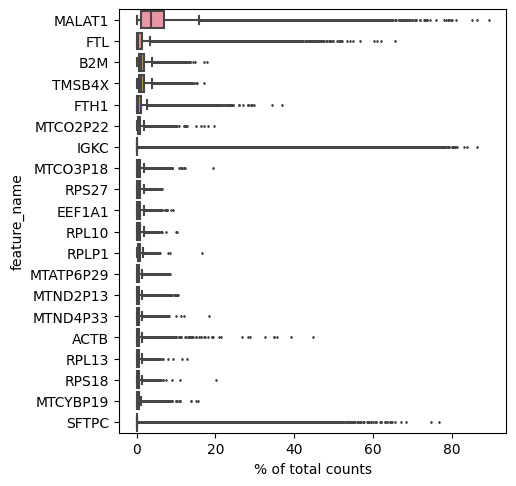

In [6]:
sc.pl.highest_expr_genes(adata, n_top=20)

Finally, let's look at the distribution per cell of (1) number of genes sequenced, and (2) total read counts.

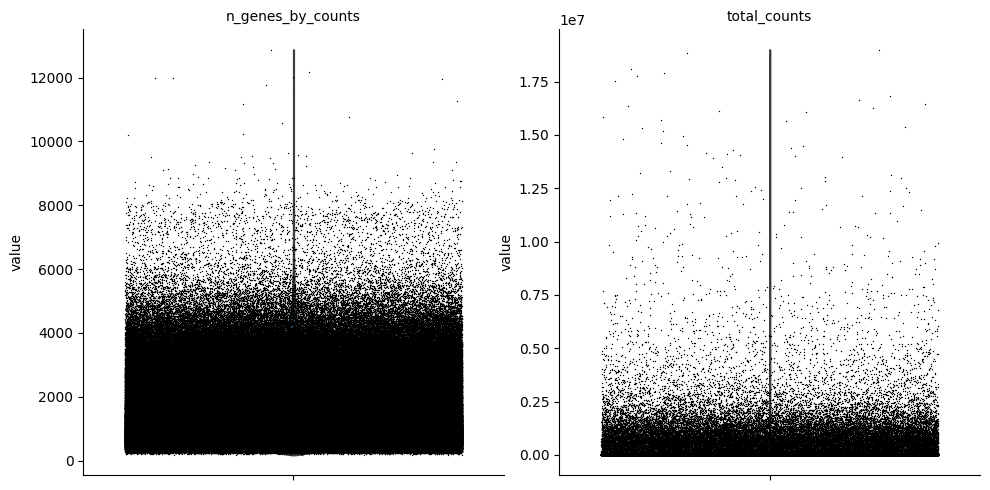

In [7]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],jitter=0.4, multi_panel=True)